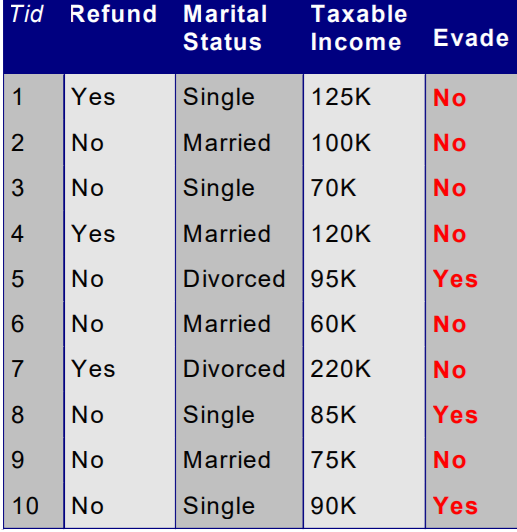

Compute the posterior probability P(X | X1 , X2 , …, Xn ) for all values of X using the Bayes theorem
Given : X => Refund = No ; Marital Status = Married ; Taxable Income = 140K;

In [ ]:
import pandas as pd
import numpy as np
from math import *

In [ ]:
df = pd.DataFrame()

#add outlook
df['refund'] = ['yes', 'no','no','yes', 'no','no','yes','no','no','no' ]

#add temperature
df['martial_status'] = ['single', 'married', 'single', 'married','divorced', 'married','divorced','single', 'married','single',]

#add humidity
df['taxable_income'] = [125000,100000,70000,120000,95000,60000,220000,85000,75000,90000]

#add windy
df['evade'] = [ 'no','no','no','no','yes','no','no','yes','no','yes' ]

df

,refund,martial_status,taxable_income,evade
0,yes,single,125000,no
1,no,married,100000,no
2,no,single,70000,no
3,yes,married,120000,no
4,no,divorced,95000,yes
5,no,married,60000,no
6,yes,divorced,220000,no
7,no,single,85000,yes
8,no,married,75000,no
9,no,single,90000,yes


In [ ]:
for i in range(len(df)):
  df.loc[i,'taxable_income']=str(ceil(df.loc[i,'taxable_income']/100000))
df

,refund,martial_status,taxable_income,evade
0,yes,single,2,no
1,no,married,1,no
2,no,single,1,no
3,yes,married,2,no
4,no,divorced,1,yes
5,no,married,1,no
6,yes,divorced,3,no
7,no,single,1,yes
8,no,married,1,no
9,no,single,1,yes


In [ ]:
data = pd.get_dummies(df[df.columns])
data

,refund_no,refund_yes,martial_status_divorced,martial_status_married,martial_status_single,taxable_income_1,taxable_income_2,taxable_income_3,evade_no,evade_yes
0,0,1,0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0,0,1,0
2,1,0,0,0,1,1,0,0,1,0
3,0,1,0,1,0,0,1,0,1,0
4,1,0,1,0,0,1,0,0,0,1
5,1,0,0,1,0,1,0,0,1,0
6,0,1,1,0,0,0,0,1,1,0
7,1,0,0,0,1,1,0,0,0,1
8,1,0,0,1,0,1,0,0,1,0
9,1,0,0,0,1,1,0,0,0,1


In [ ]:
for i in range(1,4):
  if('taxable_income_'+str(i) not in data.columns):
    data['taxable_income_'+str(i)]=[0 for i in range(10)]

In [ ]:
x=['no','married',140000]
x[2]=str(ceil(x[2]/100000))
x

['no', 'married', '2']

In [ ]:
def pa(data,cls,sbcls):
  strn=str(cls)+'_'+str(sbcls)
  return(sum(data[strn])/len(strn))
def pa_b(data,clsa,sbclsa,clsb,sbclsb):
  strna=str(clsa)+'_'+str(sbclsa)
  strnb=str(clsb)+'_'+str(sbclsb)
  anb=0
  for i in range(len(data)):
    if(data.loc[i,strna]&data.loc[i,strnb]):
      anb+=1
  return(anb/sum(data[strnb]))
prby=[]
prbn=[]
col=df.columns
for i in range(len(x)):
  prby.append(pa_b(data,col[i],x[i],'evade','yes'))
prb=1
for i in prby:
  prb*=i
print('yes : ',prb*pa(data,'evade','yes'))
for i in range(len(x)):
  prbn.append(pa_b(data,col[i],x[i],'evade','no'))
prb=1
for i in prbn:
  prb*=i
print('no : ',prb*pa(data,'evade','no'))
print('Evade of X is No')

yes :  0.0
no :  0.08163265306122447
Evade of X is No
